#### About
Image filters using OpenCV Python.

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

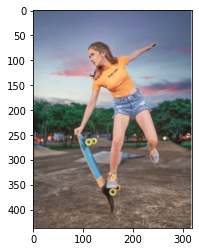

In [5]:
img = cv2.imread('Image.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

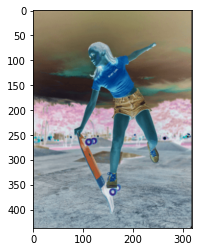

In [6]:
#applying inversion -- Negative of the picture
inverted_frame = cv2.bitwise_not(img)
plt.imshow(inverted_frame)
plt.show()

In [ ]:
#applying inversion
inverted_frame = cv2.bitwise_not(img)
plt.imshow(inverted_frame)
plt.show()

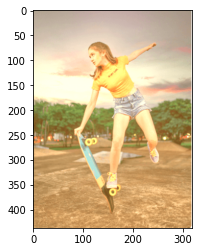

In [9]:
#applying sepia
#converting to alpha channel
frame = cv2.cvtColor(img, cv2.COLOR_RGB2BGRA)
frame_h, frame_w, frame_c = frame.shape #height,width, channels
blue = 15
green = 86
red = 132
sepia_bgra = (blue,green,red,1) # alpha =1
overlay = np.full((frame_h,frame_w,4),sepia_bgra,dtype='uint8')
cv2.addWeighted(overlay, 0.7,frame,1.0,0,frame) #0.7 - intensity
#converting back to rgb
frame = cv2.cvtColor(frame, cv2.COLOR_BGRA2RGB)
plt.imshow(frame)
plt.show()

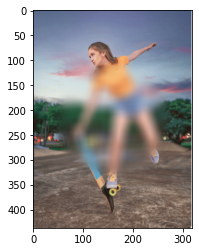

In [13]:
#applying circle focus blue
frame = cv2.cvtColor(img, cv2.COLOR_RGB2BGRA)
frame_h, frame_w, frame_c = frame.shape #height,width, channels
#circle in the middle of frame
y = int(frame_h/2)
x= int(frame_w/2)
radius = int(y/2)
center = (x,y)
mask = np.zeros((frame_h,frame_w,4),dtype='uint8')
cv2.circle(mask,center,radius, (255,255,255),-1, cv2.LINE_AA)
mask = cv2.GaussianBlur(mask,(25,25),15)

blurred = cv2.GaussianBlur(frame,(25,25),15)
alpha = mask/255.0
#c
blended = cv2.convertScaleAbs(frame*(1-alpha) + blurred*alpha)
frame = cv2.cvtColor(blended,cv2.COLOR_BGRA2RGB)
plt.imshow(frame)


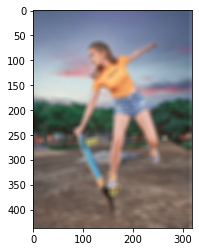

In [22]:
#portrait mode -- works better with white background
frame = cv2.cvtColor(img, cv2.COLOR_RGB2BGRA)
frame_h, frame_w, frame_c = frame.shape #height,width, channels
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
_,mask = cv2.threshold(gray, 120,255,cv2.THRESH_BINARY)
mask = cv2.cvtColor(mask,cv2.COLOR_GRAY2BGRA)
blurred = cv2.GaussianBlur(frame,(11,11),11)
alpha = mask/255.0
blended = cv2.convertScaleAbs(frame*(1-alpha) + blurred*alpha)
frame = cv2.cvtColor(blurred,cv2.COLOR_BGRA2RGB)
plt.imshow(frame)
plt.show()
